In [1]:
import math
import numpy as np
import joblib


In [2]:
def split_audio_test(test_mfccs, segment_length_sec):

    # Compute the number of frames per segment
    frames_per_sec = 100  # Assuming 100 frames per second
    frames_per_segment = int(segment_length_sec * frames_per_sec)

    # Split the test audio into segments
    num_segments = math.ceil(len(test_mfccs) / frames_per_segment)
    test_segments = []
    for i in range(num_segments):
        start_frame = i * frames_per_segment
        end_frame = min(start_frame + frames_per_segment, len(test_mfccs))
        segment = test_mfccs[start_frame:end_frame]
        test_segments.append(segment)

    return test_segments

In [3]:
test_mfccs_russe = np.loadtxt(r'C:\Users\ASUS ROG STRIX\Desktop\Projet\Langues\gmm\Test\englishTest', delimiter=',')
test_segments_5s_russe = split_audio_test(test_mfccs_russe, 5)
test_segments_10s_russe = split_audio_test(test_mfccs_russe, 10)
test_segments_15s_russe = split_audio_test(test_mfccs_russe, 15)

In [4]:
# Load the GMM models for each language
russian_gmm512 = joblib.load(r'C:\Users\ASUS ROG STRIX\Desktop\Projet\Langues\gmm\russe\gmm_model512_russe.pkl')
arabic_gmm512 = joblib.load(r'C:\Users\ASUS ROG STRIX\Desktop\Projet\Langues\gmm\arabic\gmm_model512_arabic.pkl')
spanish_gmm512 = joblib.load(r'C:\Users\ASUS ROG STRIX\Desktop\Projet\Langues\gmm\spanish\gmm_model512_spanish.pkl')
english_gmm512 = joblib.load(r'C:\Users\ASUS ROG STRIX\Desktop\Projet\Langues\gmm\english\gmm_model512_english.pkl')
japanese_gmm512 = joblib.load(r'C:\Users\ASUS ROG STRIX\Desktop\Projet\Langues\gmm\japanese\gmm_model512_japanese.pkl')
french_gmm512 = joblib.load(r'C:\Users\ASUS ROG STRIX\Desktop\Projet\Langues\gmm\french\gmm_model512_french.pkl')

In [5]:
def predict_language(mfccs, russian_gmm, arabic_gmm, spanish_gmm, english_gmm, japanese_gmm, french_gmm):

    
    # calculate the scores for each language
    russian_score = russian_gmm.score_samples(mfccs)
    arabic_score = arabic_gmm.score_samples(mfccs)
    spanish_score = spanish_gmm.score_samples(mfccs)
    english_score = english_gmm.score_samples(mfccs)
    japanese_score = japanese_gmm.score_samples(mfccs)
    french_score = french_gmm.score_samples(mfccs)
    
    # return the language with the highest score
    scores = {"russian": russian_score.mean(), "arabic": arabic_score.mean(), "spanish": spanish_score.mean(), 
              "english": english_score.mean(), "japanese": japanese_score.mean(), "french": french_score.mean()}
    predicted_language = max(scores, key=scores.get)
    max_score = scores[predicted_language]


    return  max_score , predicted_language

In [6]:
results5s = []
for test_segment in test_segments_5s_russe:
    mydict = {}
    mydict["maxScore"], mydict["predictedLanguage"] = predict_language(test_segment, russian_gmm512, arabic_gmm512, 
                                                                   spanish_gmm512, english_gmm512, japanese_gmm512, 
                                                                   french_gmm512)
    results5s.append(mydict)
    
for result in results5s:
    print("MAX_Score:", result["maxScore"] ,"--- Predicted Language:", result["predictedLanguage"] )
   


MAX_Score: -47.78677084977642 --- Predicted Language: english
MAX_Score: -48.751250318113975 --- Predicted Language: english
MAX_Score: -48.85947844996348 --- Predicted Language: english
MAX_Score: -49.01768348879713 --- Predicted Language: english
MAX_Score: -49.22699090344415 --- Predicted Language: english
MAX_Score: -48.419243153265356 --- Predicted Language: english
MAX_Score: -48.30844713251375 --- Predicted Language: english
MAX_Score: -48.27517187780657 --- Predicted Language: english
MAX_Score: -48.58653318199543 --- Predicted Language: english
MAX_Score: -48.635850494951754 --- Predicted Language: english
MAX_Score: -49.70863728846016 --- Predicted Language: english
MAX_Score: -47.75113367162979 --- Predicted Language: english
MAX_Score: -48.11790883064265 --- Predicted Language: english
MAX_Score: -48.813234558202204 --- Predicted Language: english
MAX_Score: -48.48356401291336 --- Predicted Language: english
MAX_Score: -48.49303206204453 --- Predicted Language: english
MAX_

In [7]:
results10s = []
for test_segment in test_segments_10s_russe:
    mydict = {}
    mydict["maxScore"], mydict["predictedLanguage"] = predict_language(test_segment, russian_gmm512, arabic_gmm512, 
                                                                   spanish_gmm512, english_gmm512, japanese_gmm512, 
                                                                   french_gmm512)
    results10s.append(mydict)
    
for result in results10s:
    print("MAX_Score:", result["maxScore"] ,"--- Predicted Language:", result["predictedLanguage"] )

MAX_Score: -48.2690105839452 --- Predicted Language: english
MAX_Score: -48.93858096938032 --- Predicted Language: english
MAX_Score: -48.82311702835475 --- Predicted Language: english
MAX_Score: -48.29180950516015 --- Predicted Language: english
MAX_Score: -48.611191838473594 --- Predicted Language: english
MAX_Score: -48.72988548004498 --- Predicted Language: english
MAX_Score: -48.46557169442242 --- Predicted Language: english
MAX_Score: -48.48829803747895 --- Predicted Language: english
MAX_Score: -46.126662386431896 --- Predicted Language: english
MAX_Score: -45.22948240353833 --- Predicted Language: english
MAX_Score: -48.841364380183784 --- Predicted Language: english
MAX_Score: -48.664110237144634 --- Predicted Language: english
MAX_Score: -48.653834358675944 --- Predicted Language: english
MAX_Score: -48.39535704934412 --- Predicted Language: english
MAX_Score: -51.12707135571648 --- Predicted Language: english
MAX_Score: -49.242342619059514 --- Predicted Language: english
MAX

In [8]:
results15s = []
for test_segment in test_segments_15s_russe:
    mydict = {}
    mydict["maxScore"], mydict["predictedLanguage"] = predict_language(test_segment, russian_gmm512, arabic_gmm512, 
                                                                   spanish_gmm512, english_gmm512, japanese_gmm512, 
                                                                   french_gmm512)
    results15s.append(mydict)
    
for result in results15s:
    print("MAX_Score:", result["maxScore"] ,"--- Predicted Language:", result["predictedLanguage"] )

MAX_Score: -48.46583320595129 --- Predicted Language: english
MAX_Score: -48.88797251516888 --- Predicted Language: english
MAX_Score: -48.39005073077191 --- Predicted Language: english
MAX_Score: -48.6985404850139 --- Predicted Language: english
MAX_Score: -48.47156913391941 --- Predicted Language: english
MAX_Score: -46.91545227830278 --- Predicted Language: english
MAX_Score: -46.50540565631768 --- Predicted Language: english
MAX_Score: -48.651232357593486 --- Predicted Language: english
MAX_Score: -48.60655934873103 --- Predicted Language: english
MAX_Score: -50.17761582709333 --- Predicted Language: english
MAX_Score: -49.128418732085585 --- Predicted Language: english
MAX_Score: -49.037023370955175 --- Predicted Language: english
MAX_Score: -49.11948560190001 --- Predicted Language: english
MAX_Score: -55.19403717990738 --- Predicted Language: english
MAX_Score: -50.142050920763836 --- Predicted Language: english
MAX_Score: -49.294742978178256 --- Predicted Language: english
MAX_

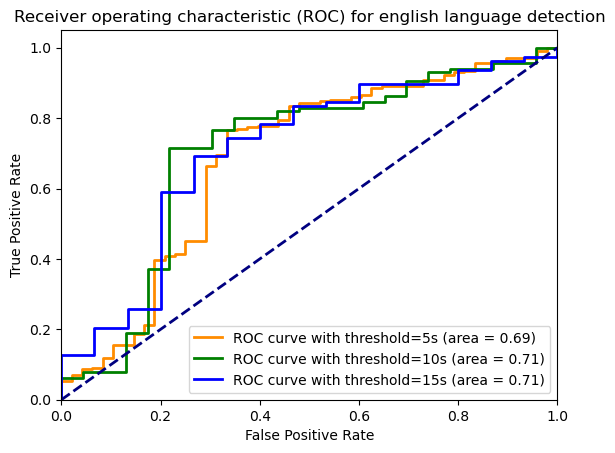

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted scores and true labels for english with different thresholds
scores5s = [result["maxScore"] for result in results5s]
labels5s = [1 if result["predictedLanguage"] == "english" else 0 for result in results5s]

scores10s = [result["maxScore"] for result in results10s]
labels10s = [1 if result["predictedLanguage"] == "english" else 0 for result in results10s]

scores15s = [result["maxScore"] for result in results15s]
labels15s = [1 if result["predictedLanguage"] == "english" else 0 for result in results15s]

# Compute the FPR, TPR, and AUC for each ROC curve
fpr5s, tpr5s, thresholds5s = roc_curve(labels5s, scores5s)
roc_auc5s = auc(fpr5s, tpr5s)

fpr10s, tpr10s, thresholds10s = roc_curve(labels10s, scores10s)
roc_auc10s = auc(fpr10s, tpr10s)

fpr15s, tpr15s, thresholds15s = roc_curve(labels15s, scores15s)
roc_auc15s = auc(fpr15s, tpr15s)

# Plot the ROC curves on the same figure
plt.figure()
plt.plot(fpr5s, tpr5s, color='darkorange', lw=2, label='ROC curve with threshold=5s (area = %0.2f)' % roc_auc5s)
plt.plot(fpr10s, tpr10s, color='green', lw=2, label='ROC curve with threshold=10s (area = %0.2f)' % roc_auc10s)
plt.plot(fpr15s, tpr15s, color='blue', lw=2, label='ROC curve with threshold=15s (area = %0.2f)' % roc_auc15s)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) for english language detection')
plt.legend(loc="lower right")
plt.show()
